Importing Libraries

In [79]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
#logistic
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#metrics, accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#SVC
from sklearn.svm import SVC
#GNB
from sklearn.naive_bayes import GaussianNB
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn import tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier

Cố định seed

In [80]:
np.random.seed(1)

Importing

In [81]:
path = "https://raw.githubusercontent.com/sagetheanine/stroke/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

In [82]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [83]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [84]:
df["stroke"].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [85]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [86]:
df.drop(df[(df["smoking_status"] == "Unknown")].index, inplace = True)

In [87]:
#check NaN
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   object 
 6   work_type          3566 non-null   object 
 7   Residence_type     3566 non-null   object 
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3426 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 362.2+ KB


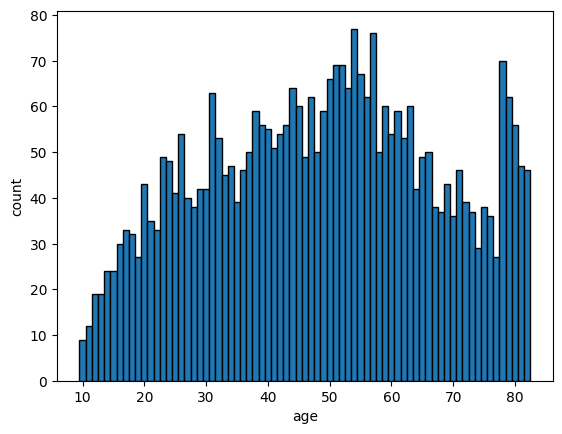

In [88]:
ages = np.array(df.age.values)

d = np.diff(np.unique(ages)).min()
left_of_first_bin = ages.min() - float(d)/2
right_of_last_bin = ages.max() + float(d)/2
plt.hist(ages, np.arange(left_of_first_bin, right_of_last_bin + d, d), edgecolor = "black")
plt.ylabel("count")
plt.xlabel("age")
plt.show()

Downsampling

In [89]:
stroke_0 = df[df['stroke'] == 0]
stroke_1 = df[df['stroke'] == 1]
print(stroke_0.shape)
print(stroke_1.shape)

(3246, 12)
(180, 12)


In [90]:
from sklearn.utils import resample
stroke_0_downsample = resample(stroke_0, replace=True, n_samples = len(stroke_1), random_state= 1)
print(stroke_0_downsample.shape)

(180, 12)


In [91]:
df = pd.concat([stroke_0_downsample, stroke_1])

In [92]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 1820 to 246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 360 non-null    int64  
 1   gender             360 non-null    object 
 2   age                360 non-null    float64
 3   hypertension       360 non-null    int64  
 4   heart_disease      360 non-null    int64  
 5   ever_married       360 non-null    object 
 6   work_type          360 non-null    object 
 7   Residence_type     360 non-null    object 
 8   avg_glucose_level  360 non-null    float64
 9   bmi                360 non-null    float64
 10  smoking_status     360 non-null    object 
 11  stroke             360 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 36.6+ KB


In [93]:
df["stroke"].value_counts(normalize = True)

0    0.5
1    0.5
Name: stroke, dtype: float64

Cleaning

In [94]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1820,47608,Female,21.0,0,0,No,Private,Urban,208.17,24.9,never smoked,0
599,64174,Female,59.0,1,0,Yes,Private,Urban,204.86,30.8,never smoked,0
1878,27479,Male,63.0,0,0,Yes,Self-employed,Rural,104.70,21.0,formerly smoked,0
1580,66419,Male,25.0,0,0,Yes,Private,Rural,119.96,27.7,never smoked,0
4411,13237,Male,57.0,0,1,Yes,Self-employed,Urban,112.37,28.4,never smoked,0


In [95]:
#drop id column
df = df.drop(["id"], axis = 1)

In [96]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
108,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
168,Female,79.0,1,0,No,Govt_job,Urban,98.02,22.3,formerly smoked,1
2319,Male,68.0,1,0,Yes,Private,Urban,96.06,37.6,never smoked,0
470,Male,26.0,0,0,Yes,Private,Rural,100.09,27.4,never smoked,0
1264,Female,38.0,0,0,Yes,Private,Urban,69.34,43.7,never smoked,0


In [97]:
#check NaN
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 1820 to 246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             360 non-null    object 
 1   age                360 non-null    float64
 2   hypertension       360 non-null    int64  
 3   heart_disease      360 non-null    int64  
 4   ever_married       360 non-null    object 
 5   work_type          360 non-null    object 
 6   Residence_type     360 non-null    object 
 7   avg_glucose_level  360 non-null    float64
 8   bmi                360 non-null    float64
 9   smoking_status     360 non-null    object 
 10  stroke             360 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 33.8+ KB


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 1820 to 246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             360 non-null    object 
 1   age                360 non-null    float64
 2   hypertension       360 non-null    int64  
 3   heart_disease      360 non-null    int64  
 4   ever_married       360 non-null    object 
 5   work_type          360 non-null    object 
 6   Residence_type     360 non-null    object 
 7   avg_glucose_level  360 non-null    float64
 8   bmi                360 non-null    float64
 9   smoking_status     360 non-null    object 
 10  stroke             360 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 33.8+ KB


In [99]:
display(df.gender.unique())
#display(df.age.unique())
display(df.hypertension.unique())
display(df.heart_disease.unique())
display(df.work_type.unique())
display(df.Residence_type.unique())
display(df.avg_glucose_level.unique())
#display(df.bmi.unique())
display(df.smoking_status.unique())

array(['Female', 'Male'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

array(['Urban', 'Rural'], dtype=object)

array([208.17, 204.86, 104.7 , 119.96, 112.37,  88.04, 103.46,  74.44,
        94.48,  81.36, 221.06,  82.37,  60.96,  81.76,  91.08,  97.58,
        95.49,  80.44,  69.4 ,  68.98,  67.99,  56.48,  71.18, 234.51,
        86.33,  98.53,  90.77, 222.46, 162.24,  73.56,  81.66,  56.18,
       112.7 , 102.35, 212.62,  86.53, 240.71, 111.96, 120.58,  85.82,
       202.06,  94.64, 140.52,  97.86,  69.52, 140.39, 111.15, 133.58,
        59.15, 115.91, 216.07, 113.25,  56.87,  67.5 ,  55.12,  95.36,
       136.81, 119.9 ,  83.14, 135.19, 129.54,  71.08, 236.79,  62.6 ,
        72.49,  59.62,  74.65,  78.24, 168.15,  58.42,  57.83,  74.36,
        83.07,  70.08,  96.98,  63.71, 131.05,  95.05,  77.92,  70.23,
       116.84,  98.9 ,  83.88,  93.79,  77.75,  56.9 ,  82.13,  85.52,
        74.35,  85.04,  63.33, 107.18,  96.06, 131.8 , 156.45, 105.76,
        93.88,  76.26,  57.28,  96.02,  57.82,  58.63, 100.08, 119.01,
        83.78, 125.89, 112.55,  67.78, 142.12, 126.68,  79.18,  63.6 ,
      

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [100]:
# thêm cột body_type:
body_type = []
for row in df['bmi']:
    if row < 18:
        body_type.append("underweight")
    elif row >= 18 and row < 25:
        body_type.append("healthy")
    elif row >= 25 and row < 30:
        body_type.append("overweight")
    elif row >= 30:
        body_type.append("obese")

In [101]:
df['body_type'] = body_type

In [102]:
df["stroke"].value_counts()

0    180
1    180
Name: stroke, dtype: int64

In [103]:
# drop col bmi sau khi có cột body_type:
df.drop(["bmi"], axis = 1, inplace = True)
df = df.reset_index(drop = True)

In [104]:
non_objects = ["age", "hypertension", "heart_disease", "avg_glucose_level", "stroke"]
objects = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "body_type"]

In [105]:
df_objects = df[objects]
df_nums = df[non_objects]

In [106]:
df_objects

,gender,ever_married,work_type,Residence_type,smoking_status,body_type
0,Female,No,Private,Urban,never smoked,healthy
1,Female,Yes,Private,Urban,never smoked,obese
2,Male,Yes,Self-employed,Rural,formerly smoked,healthy
3,Male,Yes,Private,Rural,never smoked,overweight
4,Male,Yes,Self-employed,Urban,never smoked,overweight
...,...,...,...,...,...,...
355,Male,Yes,Private,Rural,formerly smoked,healthy
356,Male,Yes,Private,Rural,formerly smoked,obese
357,Male,Yes,Private,Rural,never smoked,obese
358,Female,Yes,Private,Urban,formerly smoked,obese


Encode các cột object sử dụng LabelEncode

In [107]:
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df_objects = df_objects.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df_objects

,gender,ever_married,work_type,Residence_type,smoking_status,body_type
0,0,0,2,1,1,0
1,0,1,2,1,1,1
2,1,1,3,0,0,0
3,1,1,2,0,1,2
4,1,1,3,1,1,2
...,...,...,...,...,...,...
355,1,1,2,0,0,0
356,1,1,2,0,0,1
357,1,1,2,0,1,1
358,0,1,2,1,0,1


Normalize các giá trị số

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_nums)
data_minmax= scaler.transform(df_nums)

In [109]:
df_nums = pd.DataFrame(data = data_minmax, columns = df_nums.columns)
df_nums

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,0.152778,0.0,0.0,0.706537,0.0
1,0.680556,1.0,0.0,0.691257,0.0
2,0.736111,0.0,0.0,0.228880,0.0
3,0.208333,0.0,0.0,0.299326,0.0
4,0.652778,0.0,1.0,0.264288,0.0
...,...,...,...,...,...
355,0.777778,0.0,0.0,0.098514,1.0
356,0.652778,0.0,0.0,0.656264,1.0
357,0.805556,0.0,0.0,0.825501,1.0
358,0.805556,1.0,1.0,0.888145,1.0


In [110]:
df_nums.stroke = df_nums.stroke.astype("int")
df_nums

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,0.152778,0.0,0.0,0.706537,0
1,0.680556,1.0,0.0,0.691257,0
2,0.736111,0.0,0.0,0.228880,0
3,0.208333,0.0,0.0,0.299326,0
4,0.652778,0.0,1.0,0.264288,0
...,...,...,...,...,...
355,0.777778,0.0,0.0,0.098514,1
356,0.652778,0.0,0.0,0.656264,1
357,0.805556,0.0,0.0,0.825501,1
358,0.805556,1.0,1.0,0.888145,1


In [111]:
df = pd.concat([df_objects, df_nums], axis=1)
df

,gender,ever_married,work_type,Residence_type,smoking_status,body_type,age,hypertension,heart_disease,avg_glucose_level,stroke
0,0,0,2,1,1,0,0.152778,0.0,0.0,0.706537,0
1,0,1,2,1,1,1,0.680556,1.0,0.0,0.691257,0
2,1,1,3,0,0,0,0.736111,0.0,0.0,0.228880,0
3,1,1,2,0,1,2,0.208333,0.0,0.0,0.299326,0
4,1,1,3,1,1,2,0.652778,0.0,1.0,0.264288,0
...,...,...,...,...,...,...,...,...,...,...,...
355,1,1,2,0,0,0,0.777778,0.0,0.0,0.098514,1
356,1,1,2,0,0,1,0.652778,0.0,0.0,0.656264,1
357,1,1,2,0,1,1,0.805556,0.0,0.0,0.825501,1
358,0,1,2,1,0,1,0.805556,1.0,1.0,0.888145,1


Hiển thị correlation

<Axes: >

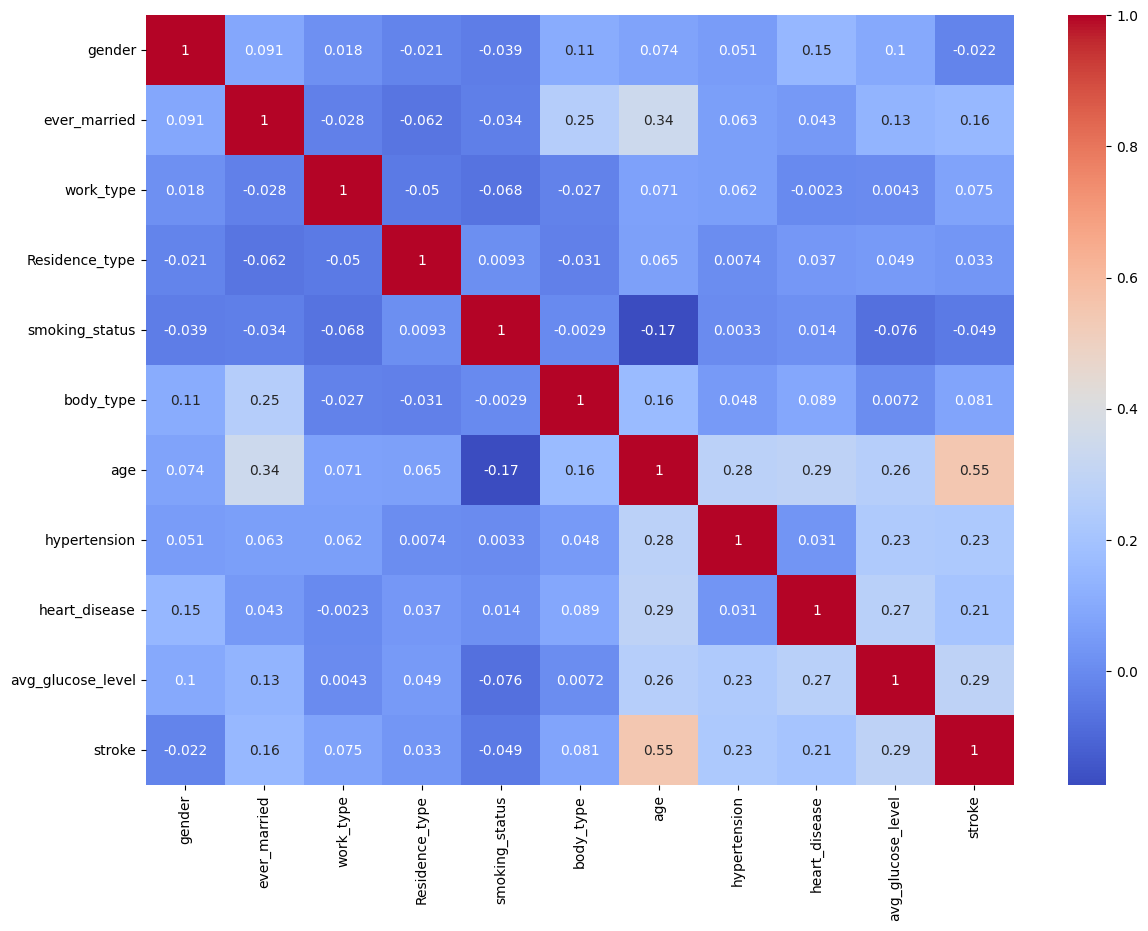

In [112]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Chọn biến và chia tập test, train

In [113]:
# Lấy các biến ever_married, age, hypertension, heart_disease, avg_glucose_level
y = df.stroke.values
X = df[["ever_married", "age", "hypertension", "heart_disease", "avg_glucose_level"]]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43) # để cao random_state để chính xác hơn 

Xây dựng mô hình logistic

In [115]:
model_logis = linear_model.LogisticRegression()
model_logis.fit(X_train, y_train)
y_pred = model_logis.predict(X_test)

In [116]:
model_logis_accuracy1 =  accuracy_score(y_train, model_logis.predict(X_train))
print("Train acc of logistic model: %.2f" % model_logis_accuracy1)
model_logis_accuracy2 = accuracy_score(y_test, model_logis.predict(X_test))
print("Test acc of logistic model: %.2f" % model_logis_accuracy2)

Train acc of logistic model: 0.75
Test acc of logistic model: 0.81


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        51
           1       0.82      0.81      0.81        57

    accuracy                           0.81       108
   macro avg       0.80      0.81      0.81       108
weighted avg       0.81      0.81      0.81       108



In [118]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[41, 10],
       [11, 46]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

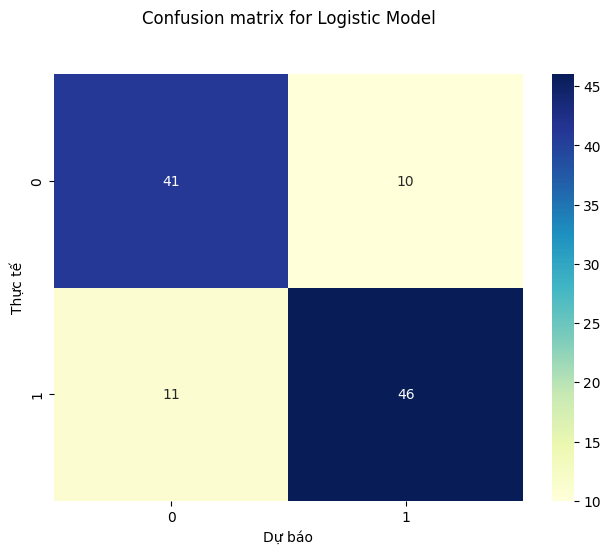

In [119]:
class_names=['0',"1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Model', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Xây dựng mô hình SVM

In [120]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C= 0.1, gamma=0.3)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

In [121]:
#tính độ chính xác
model_svm_accuracy1 =  accuracy_score(y_train, model_svm.predict(X_train))
print("Train acc of SVM: %.2f" % model_svm_accuracy1)
model_svm_accuracy2 = accuracy_score(y_test, model_svm.predict(X_test))
print("Test acc of SVM: %.2f" % model_svm_accuracy2)

Train acc of SVM: 0.76
Test acc of SVM: 0.80


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        51
           1       0.81      0.81      0.81        57

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.80       108



In [123]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[40, 11],
       [11, 46]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

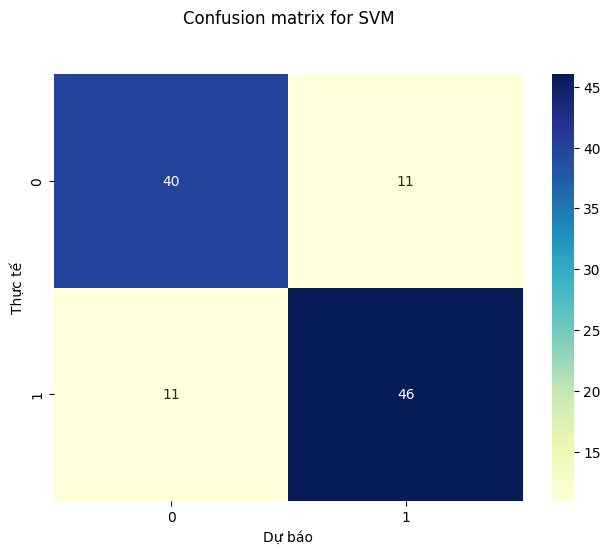

In [124]:
class_names=['0',"1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Xây dựng mô hình Decision Tree

In [125]:
# tim max_depth
score_tree_total=[]
for i in range(2,20,1):
  model_tree = tree.DecisionTreeClassifier(max_depth=i,random_state= 1)
  model_tree.fit(X_train, y_train)
  score = model_tree.score(X_test, y_test)
  score_tree_total.append([score])

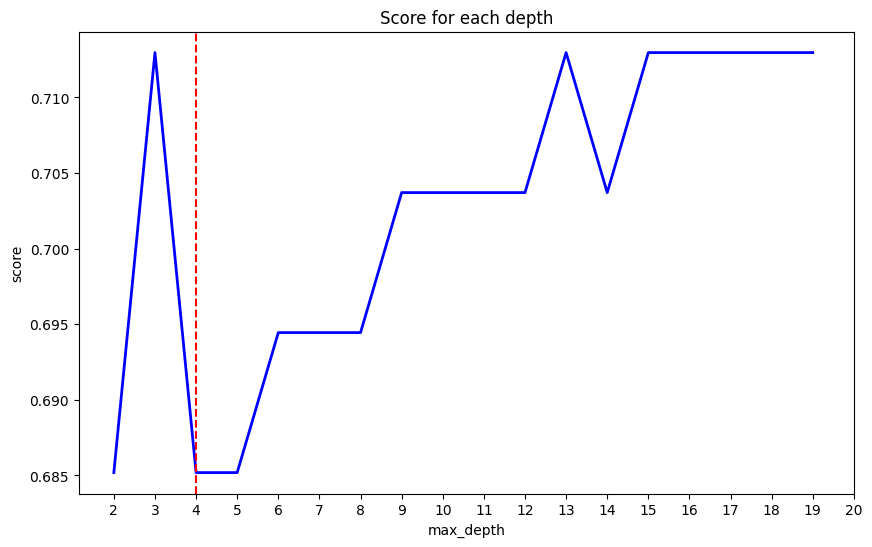

In [126]:
plt.figure(figsize=(10,6))
plt.title('Score for each depth')
plt.plot(range(2,20,1), score_tree_total, linewidth=2, color='blue')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=4, color = "red", linestyle = "--")
plt.show()

In [127]:
#max_depth = 8
model_tree = tree.DecisionTreeClassifier(max_depth = 3)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [128]:
model_tree_accuracy1 =  accuracy_score(y_train, model_tree.predict(X_train))
print("Train acc of decision tree: %.2f" % model_tree_accuracy1)
model_tree_accuracy2 = accuracy_score(y_test, model_tree.predict(X_test))
print("Test acc of decision tree: %.2f" % model_tree_accuracy2)

Train acc of decision tree: 0.79
Test acc of decision tree: 0.71


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64        51
           1       0.68      0.88      0.76        57

    accuracy                           0.71       108
   macro avg       0.73      0.70      0.70       108
weighted avg       0.73      0.71      0.70       108



Text(0.5, 23.52222222222222, 'Dự báo')

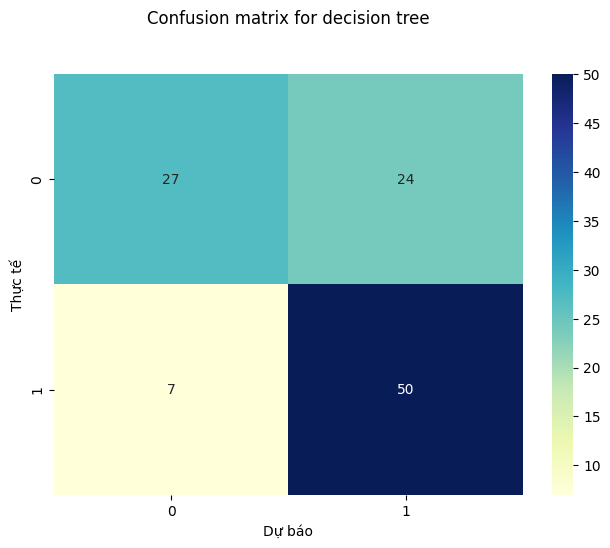

In [130]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for decision tree', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Random Forest

In [131]:
# tim n_estimators (lan sau dung GridSearch hoac Optuna, nhieu estimators dan den overfitting -> train >> test)
score_total=[]
for i in range(2,20,1):
  model_rf = RandomForestClassifier(n_estimators=i,random_state= 1)
  model_rf.fit(X_train, y_train)
  score = model_rf.score(X_test, y_test)
  score_total.append([score])

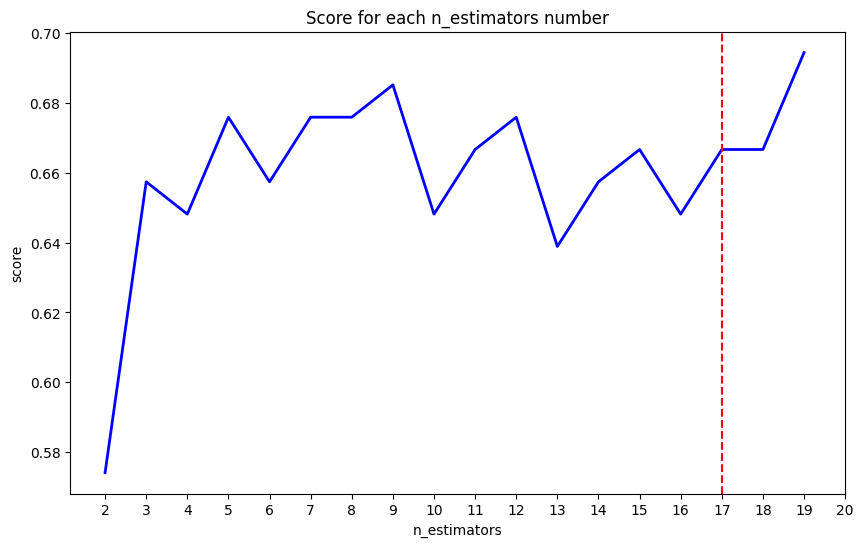

In [132]:
plt.figure(figsize=(10,6))
plt.title('Score for each n_estimators number')
plt.plot(range(2,20,1), score_total, linewidth=2, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=17, color='r', linestyle='--')
plt.show()

In [133]:
# n_estimators = 17
model_rf = RandomForestClassifier(n_estimators=6, random_state = 1) #số lượng các cây quyết định được sử dụng trong mô hình
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [134]:
y_pred=model_rf.predict(X_test)

In [135]:
model_rf_accuracy1 =  accuracy_score(y_train, model_rf.predict(X_train))
print("Train acc: %.2f" % model_rf_accuracy1)
model_rf_accuracy2 = accuracy_score(y_test, model_rf.predict(X_test))
print("Test acc: %.2f" % model_rf_accuracy2)

Train acc: 0.96
Test acc: 0.66


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64        51
           1       0.68      0.67      0.67        57

    accuracy                           0.66       108
   macro avg       0.66      0.66      0.66       108
weighted avg       0.66      0.66      0.66       108



Text(0.5, 23.52222222222222, 'Dự báo')

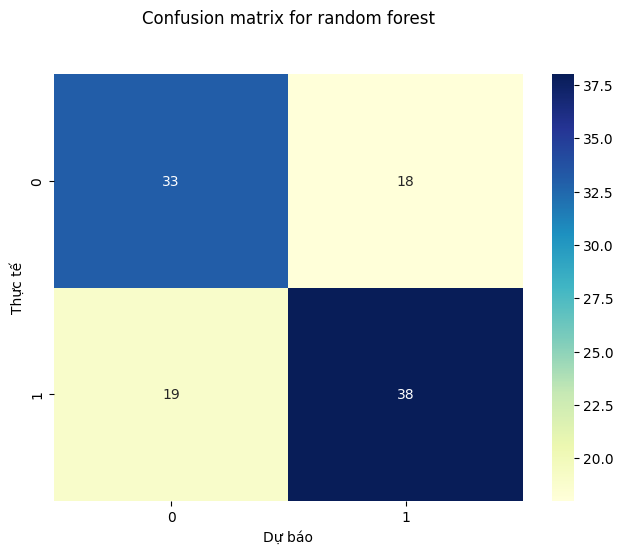

In [137]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=['0','1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for random forest', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

KNN

In [138]:
# tim n_neighbors
score_total=[]
for i in range(2,20,1):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train, y_train)
  score = model_knn.score(X_test, y_test)
  score_total.append([score])

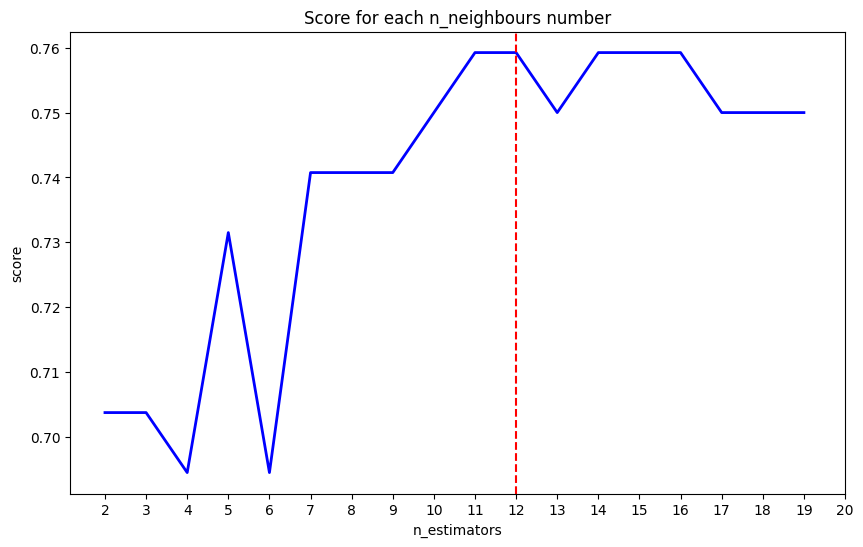

In [139]:
plt.figure(figsize=(10,6))
plt.title('Score for each n_neighbours number')
plt.plot(range(2,20,1), score_total, linewidth=2, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=12, color='r', linestyle='--')
plt.show()

In [140]:
# n_neighbors = 12
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

In [141]:
model_knn_accuracy1 =  accuracy_score(y_train, model_knn.predict(X_train))
print("Train acc: %.2f" % model_knn_accuracy1)
model_knn_accuracy2 = accuracy_score(y_test, model_knn.predict(X_test))
print("Test acc: %.2f" % model_knn_accuracy2)

Train acc: 0.80
Test acc: 0.69


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        51
           1       0.74      0.65      0.69        57

    accuracy                           0.69       108
   macro avg       0.70      0.70      0.69       108
weighted avg       0.70      0.69      0.69       108



Text(0.5, 23.52222222222222, 'Dự báo')

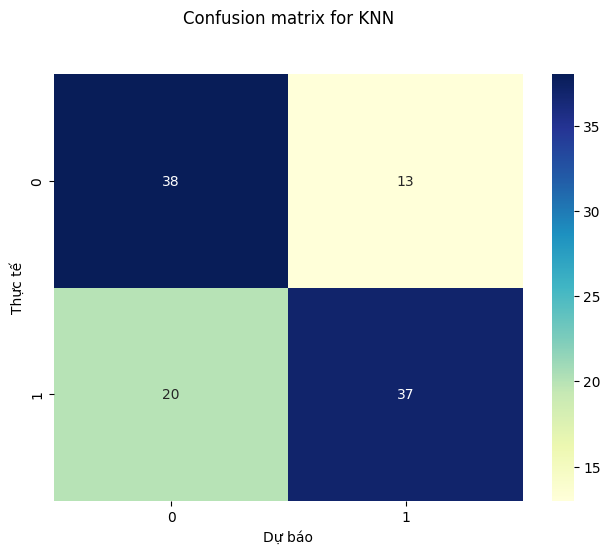

In [143]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for KNN', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

GNB

In [144]:
GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB
GNB.fit(X_train, y_train) # Training mô hình
y_pred=GNB.predict(X_test) #Dự báo

In [145]:
GNB_accuracy1 =  accuracy_score(y_train, GNB.predict(X_train))
print("Train acc: %.2f" % GNB_accuracy1)
GNB_accuracy2 = accuracy_score(y_test, GNB.predict(X_test))
print("Test acc: %.2f" % GNB_accuracy2)

Train acc: 0.75
Test acc: 0.78


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        51
           1       0.80      0.77      0.79        57

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108



Text(0.5, 23.52222222222222, 'Dự báo')

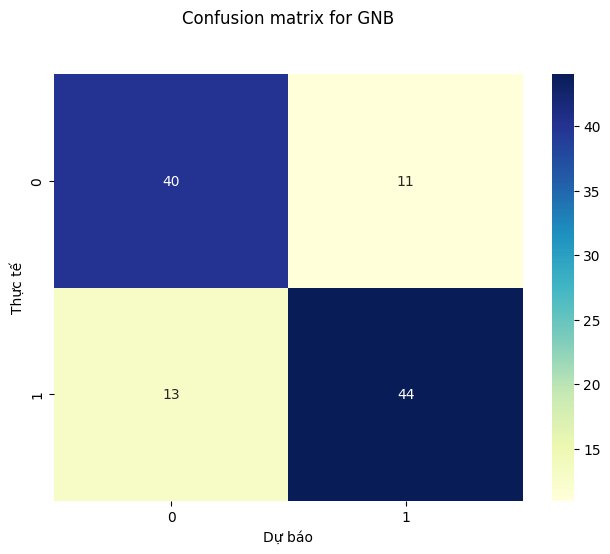

In [147]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for GNB', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Vẽ ROC và tính AUC

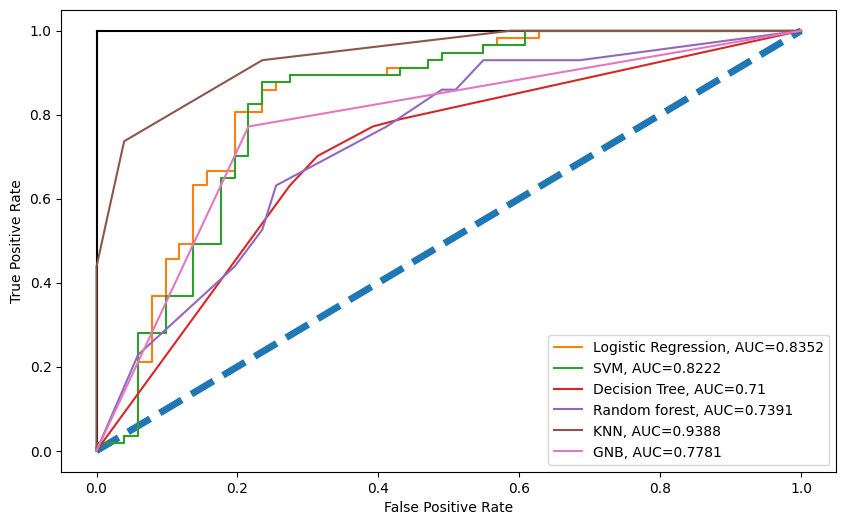

In [148]:
#set up plotting area
plt.figure(figsize=(10,6)).clf()
plt.plot([0,1],ls='--',linewidth=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')

#fit logistic regression model and plot ROC curve
model_logis = LogisticRegression()
model_logis.fit(X_train, y_train)
y_pred = model_logis.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM and plot ROC curve
model_svm = SVC(kernel='linear', C= 0.1, gamma=0.3, probability= True)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))


# fit decision tree
model_tree = tree.DecisionTreeClassifier(max_depth = 8)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

# fit rf:
model_rf = RandomForestClassifier(n_estimators=9, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

#fit knn:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X,y)
y_pred = model_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit GNB:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred=GNB.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="GNB, AUC="+str(auc))

#add legend
plt.legend()

Độ chính xác của từng mô hình

In [149]:
#logistic model:
print("Logistic")
print("Train acc of logistic model: %.2f" % model_logis_accuracy1)
print("Test acc of logistic model: %.2f" % model_logis_accuracy2)
#SVM
print("SVM")
print("Train acc of SVM: %.2f" % model_svm_accuracy1)
print("Test acc of SVM: %.2f" % model_svm_accuracy2)
#Decision Tree
print("Decision Tree")
print("Train acc of decision tree: %.2f" % model_tree_accuracy1)
print("Test acc of decision tree: %.2f" % model_tree_accuracy2)
#Random Forest
print("Random Forest")
print("Train acc of random forest: %.2f" % model_rf_accuracy1)
print("Test acc of random forest: %.2f" % model_rf_accuracy2)
#KNN
print("KNN")
print("Train acc of KNN: %.2f" % model_knn_accuracy1)
print("Test acc of KNN: %.2f" % model_knn_accuracy2)
#GNB
print("GNB")
print("Train acc of GNB: %.2f" % GNB_accuracy1)
print("Test acc of GNB: %.2f" % GNB_accuracy2)

Logistic
Train acc of logistic model: 0.75
Test acc of logistic model: 0.81
SVM
Train acc of SVM: 0.76
Test acc of SVM: 0.80
Decision Tree
Train acc of decision tree: 0.79
Test acc of decision tree: 0.71
Random Forest
Train acc of random forest: 0.96
Test acc of random forest: 0.66
KNN
Train acc of KNN: 0.80
Test acc of KNN: 0.69
GNB
Train acc of GNB: 0.75
Test acc of GNB: 0.78


Kết luận: mo hinh knn tot nhat